In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#Create a dataframe for each city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]

In [5]:
#  1. Get the total rides for each city type
urban_ride_count = urban_cities_df.count()["ride_id"]
suburban_ride_count = suburban_cities_df.count()["ride_id"]
rural_ride_count = rural_cities_df.count()["ride_id"]

print(f"The total rides for Urban cities is {urban_ride_count}.")
print(f"The total rides for Suburban cities is {suburban_ride_count}.")
print(f"The total rides for Rural cities is {rural_ride_count}.")

The total rides for Urban cities is 1625.
The total rides for Suburban cities is 625.
The total rides for Rural cities is 125.


In [6]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.sum()["driver_count"]
suburban_driver_count = suburban_cities_df.sum()["driver_count"]
rural_driver_count = rural_cities_df.sum()["driver_count"]
print(f"The total drivers for Urban cities is {urban_driver_count}.")
print(f"The total drivers for Suburban cities is {suburban_driver_count}.")
print(f"The total drivers for Rural cities is {rural_driver_count}.")

The total drivers for Urban cities is 59602.
The total drivers for Suburban cities is 8570.
The total drivers for Rural cities is 537.


In [7]:
#  3. Get the total amount of fares for each city type
urban_fares = urban_cities_df.sum()["fare"]
suburban_fares = suburban_cities_df.sum()["fare"]
rural_fares = rural_cities_df.sum()["fare"]
print(f"The total fares for Urban cities is {urban_fares:.2f}.")
print(f"The total fares for Suburban cities is {suburban_fares:.2f}.")
print(f"The total fares for Rural cities is {rural_fares:.2f}.")

The total fares for Urban cities is 39854.38.
The total fares for Suburban cities is 19356.33.
The total fares for Rural cities is 4327.93.


In [8]:
#  4. Get the average fare per ride for each city type. 
urban_average_fare = urban_fares / urban_ride_count
suburban_average_fare = suburban_fares / suburban_ride_count
rural_average_fare = rural_fares / rural_ride_count
print(f"The average fare per ride in Urban cities is {urban_average_fare:.2f}.")
print(f"The average fare per ride in Suburban cities is {suburban_average_fare:.2f}.")
print(f"The average fare per ride in Rural cities is {rural_average_fare:.2f}.")

The average fare per ride in Urban cities is 24.53.
The average fare per ride in Suburban cities is 30.97.
The average fare per ride in Rural cities is 34.62.


In [9]:
# 5. Get the average fare per driver for each city type.
urban_driver_fare = urban_fares / urban_driver_count
suburban_driver_fare = suburban_fares / suburban_driver_count
rural_driver_fare = rural_fares / rural_driver_count
print(f"The average fare per driver in Urban cities is {urban_driver_fare:.2f}.")
print(f"The average fare per driver in Suburban cities is {suburban_driver_fare:.2f}.")
print(f"The average fare per driver in Rural cities is {rural_driver_fare:.2f}.")

The average fare per driver in Urban cities is 0.67.
The average fare per driver in Suburban cities is 2.26.
The average fare per driver in Rural cities is 8.06.


In [10]:
#  6. Create a PyBer summary DataFrame. 
city_type = pyber_data_df.set_index(["type"])
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
drivers_by_type = pyber_data_df.groupby(["type"]).sum()["driver_count"]
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
average_fares_ride = sum_fares_by_type / rides_by_type
averages_fares_driver = sum_fares_by_type / drivers_by_type

pyber_summary_df = pd.DataFrame({
    "Total Rides": rides_by_type,
    "Total Drivers": drivers_by_type,
    "Total Fares": sum_fares_by_type, 
    "Average Fare per Ride": average_fares_ride,
    "Average Fare per Driver": averages_fares_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,8570,"$19,356.33",$30.97,$2.26
Urban,1625,59602,"$39,854.38",$24.53,$0.67


# Deliverable 2. Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [13]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fares_by_type_date_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

In [15]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_by_type_date_df = fares_by_type_date_df.reset_index()
fares_by_type_date_df.head(5)

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [16]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_type_date_pivot = fares_by_type_date_df.pivot(index="date", columns="type", values="fare")

In [17]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
january_to_april_df = fares_type_date_pivot.loc['2019-01-01': '2019-04-29']

In [18]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
january_to_april_df.index = pd.to_datetime(january_to_april_df.index)

In [19]:
# 7. Check that the datatype for the index is datetime using df.info()
january_to_april_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
january_to_april_month_df = january_to_april_df.resample("W").sum()

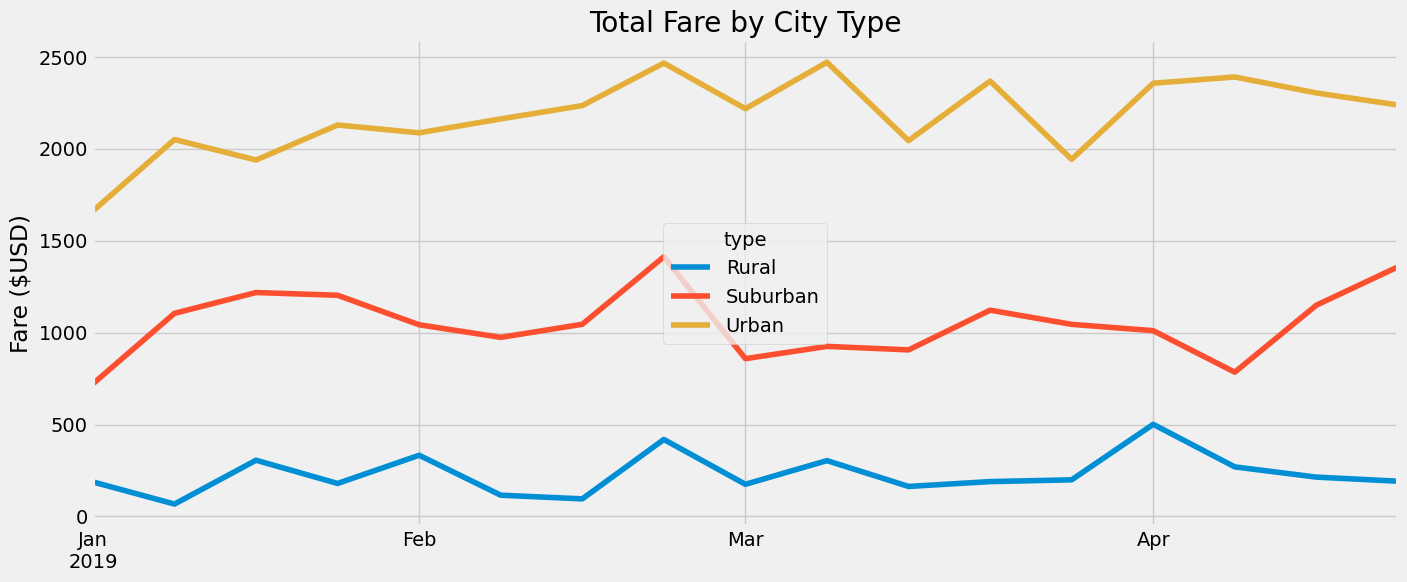

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
ax = january_to_april_month_df.plot(figsize=(15, 6))
# Add y-axis label
ax.set_ylabel("Fare ($USD)")
# Remove x-axis label
x_axis = ax.axes.get_xaxis()
x_label = x_axis.get_label()
x_label.set_visible(False)
# Add title
ax.set_title("Total Fare by City Type")
# Legend formatting
lgnd = plt.legend(loc="center", title="type")
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.show()
